In [ ]:
from scipy.io import loadmat 
import numpy as np
from collections import Counter 
import matplotlib.pyplot as plt
from random import randint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Loading MNIST data into Python
MNIST = loadmat('/content/drive/My Drive/mnist.mat')

Mounted at /content/drive


In [ ]:
MNIST

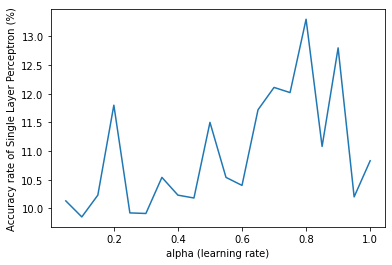

In [ ]:
### SINGLE LAYER PERCEPTRON CLASS
class Single_layer_perceptron:
 
    #Constructror.
    def __init__(self,  weights, learning_rate, bias):
        self.weights        = weights
        self.learning_rate  = learning_rate
        self.bias           = bias
 
    #Sigmoid function.
    def sigmoid(self, v):
        return 1/(1+ np.exp(-v))
 
 
    #Calculate error rate for a testing set.
    def err(d, y):
        count = 0
        for index in range(len(y)):
            if d[index] != y[index]:
                count += 1
        return count/len(d)
 
    #Normalize the image before processing it.
    def normalize_image(self, img):
        temp = np.linalg.norm(img)
        if temp == 0:
            return img
        return img / temp
 
 
    #Training the perceptron.
    def train(self, training_data, labels, training_class, no_of_desired_epochs, error_stop_value):
        error   = 1                 #starting with an error of 100%
        epoch   = 0                 #count how many epochs passed so far
        k       = 0                 #index of element in the training data
        W_temp  = self.weights
        b_temp  = self.bias
        length  = len(training_data[:,:])    #number of training data
 
        while epoch <= no_of_desired_epochs and error > error_stop_value:

            #Create the desired output array based on training class.
            if labels[k] == training_class:
                d = 1
            else:
                d = 0
 
            #Normalise the k-index training data set.
            training_image  = self.normalize_image(training_data[k,:])
 
            #Train the model
            temp            = np.dot(training_image, W_temp) + b_temp
            y               = self.sigmoid(temp)
            
            W_temp          = W_temp + (self.learning_rate * (d - y) * y * (1 - y) * training_image)
            #W_temp          = W_temp + (self.learning_rate *(d - y) * training_image)
            b_temp          = b_temp + self.learning_rate * (d - y)
 
            k       +=  1
            epoch   +=  1
            error   =   abs(d-y)
         
            k   =  k % length
            
       
        #Return the updated weights and bias after training is complete.
        return W_temp, b_temp
 
 
    def test(self, testing_data, weights, bias):
        temp =  np.dot( self.normalize_image(testing_data), weights) + bias
        return self.sigmoid(temp)
 
 
## Class for Single Layer Perceptron via ten layer perceptron
 
class Ten_layers_perceptron():
 
    def __init__(self, labels):
        self.labels = labels

    def accuracy_rate(self, output):
        count   = 0 
        dif     = output - self.labels       #Compare the output with the desired labels

        #Count number of 0s in dif. 0 means the image was classified properly
        for index in range(len(dif)):
            if dif[index] == 0:
                count +=1
        
        return (count/len(output)) * 100


    def validate(self, p):
        #p[index] is = with the probability of classifing index as index 
        #Find the biggest probability.
        max = 0 
        max_index = 0

        for index in range(10):
            if max < p[index]:
                max = p[index]
                max_index = index

        return max_index

        
########################################## MAIN ###########################################
 
#initialisation of loop calcualting accuracy against learning rate alpha
learning_rate = 0.05    #declare the learning rate.
x_axis = []     #list for plotting the learning rate.
y_axis = []     #list for plotting the error rate.
 
while learning_rate <= 1.05:
    x_axis.append(learning_rate)
    length = len(MNIST['trainX'][0][:])
    weights = np.random.randint(0, 8, size=length) 
    bias = randint(0, 8) 

    
    #Only train on 10% of the training data.
    training_data = MNIST['trainX'][:6000][:] 
    labels = MNIST['trainY'][0][:6000] 
    

    y = [None] * 10 
    t = [None] * 10
 
    #Create each layer in the perceptron.
    y[0] = Single_layer_perceptron(weights, learning_rate, bias)
    y[1] = Single_layer_perceptron(weights, learning_rate, bias)
    y[2] = Single_layer_perceptron(weights, learning_rate, bias)
    y[3] = Single_layer_perceptron(weights, learning_rate, bias)
    y[4] = Single_layer_perceptron(weights, learning_rate, bias)
    y[5] = Single_layer_perceptron(weights, learning_rate, bias)
    y[6] = Single_layer_perceptron(weights, learning_rate, bias)
    y[7] = Single_layer_perceptron(weights, learning_rate, bias)
    y[8] = Single_layer_perceptron(weights, learning_rate, bias)
    y[9] = Single_layer_perceptron(weights, learning_rate, bias)
 
    #Train the perceptrones.
    for index in range(10):
        t[index] = y[index].train(training_data, labels, index, 10000, 0.05)

    
    #Start testing.
    testing_data = MNIST['testX'][:][:]
    test_labels = MNIST['testY'][0][:]
    length_test = len(MNIST['testX'][:][:])
    
    
    results = Ten_layers_perceptron(test_labels) #declare the 10 layer perceptron
 
    probabilities = np.empty(length_test) #store resulted probabilities 
    
    temporary = np.empty(10)

    for index in range(length_test):
        testing_sample = MNIST['testX'][index][:]

        for index2 in range(10):
            temporary[index2] = y[index2].test(testing_sample, t[index2][0], t[index2][1])

        probabilities[index] = results.validate(temporary)


    y_axis.append(results.accuracy_rate(probabilities)) 
 
    learning_rate+=0.05
 
#Plot the results
 
plt.plot(x_axis, y_axis)
 
plt.xlabel('alpha (learning rate)')
 
plt.ylabel('Accuracy rate of Single Layer Perceptron (%)')

#plt.show()
plt.savefig("mygraph.png")

In [ ]:
### MLP Class

class MLP:

    def __init__(self, alpha, label):
        self.alpha = alpha #learning rate
        self.label = label #Image label for classification

    def normalize(self, v): #normalization function
        norm = np.linalg.norm(v) 
        if norm == 0: 
            return v 
        return v / norm

    def sigmoid(self, v): #Sigmoid activation function
        return 1 / (1 + np.exp(-v))

    def map(self, k, vec): #mapping function 
        d = np.zeros(10) #creating empty array of length 10
        d[vec[k]] = 1 # setting index of d corresponding to digit to 1 i.e if digit is 7, index 7 will be 1
        return d

    def bcompute(self, x, y, d, v, b_k, b_j, w_jk, w_ij): #backward computation function
        tht_k = y * (1-y) * (d-y) #theta_k of hidden layer
        w_jk = w_jk + self.alpha * np.outer(tht_k,v) #Update of Weights by using 'hadamard' product (np.outer), should be a matrix
        b_k = b_k + self.alpha * tht_k #update of bias, should be a vector corresponding to number of digits

        tht_j = v * (1-v)* (tht_k @ w_jk)
        w_ij = w_ij + self.alpha * np.outer(tht_j,x) #Weights from input to hidden node, updated using hadamard product (np.outer)
        b_j = b_j + self.alpha * tht_j #update of bias, should be a vector of size corresponding to the number of hidden nodes

        return tht_k, w_jk, b_k, tht_j, w_ij, b_j 

    def fcompute(self, W, W_h, x, b_j, b_k): #forward computation
        v = np.round(self.sigmoid(W @ self.normalize(x) + b_j), 6) #hidden nodes output, np.matmul is matrix multiplication
        y = np.round(self.sigmoid(W_h @ v + b_k), 6) #output of Multilayer perceptron
        return v, y

    def train(self, data, W, W_h, b_j, b_k, ep): #training algorithm function
        k = 0 #k is the iterator/index corresponding to the training image being extracted
        g = 0 #g is the iterator of the while loop used for the stopping condition
        err = 1 #intialisation of error to 100%
        l = len(data[:, :]) #Number of training images in the data

        while err > 0.005 or g<ep*100: #Stopping conditions
            y = self.map(k, self.label) #calling mapping function
            x = self.normalize(data[k, :]) #normalization of data 

            hidden, predicted = self.fcompute(W, W_h, x, b_j, b_k) #buffer variable used to hold forward computed value
            _, W_h, b_k, _, W, b_j = self.bcompute(x, predicted, y, hidden, b_k, b_j, W_h, W) #buffer variable used to store backward computed value

            err = np.square(np.subtract(y, predicted)).mean() #mean square error calculation from desired output and computed output
            k += 1
            k = k%l #modulus to ensure k does not exceed number of training images
            g += 1
        return W, W_h, b_j, b_k

    def output(self): # Ignore completely
        pass


class classification: # Classification class

    def __init__(self, label):
        self.label = label #Label of image i.e digit of mnist image

    def map(self, a):
        return np.argmax(a)

    def accuracy(self, d): #calculation of accuracy 
        m = len(d)
        e = d-self.label
        return np.sum(e == 0) / m * 100

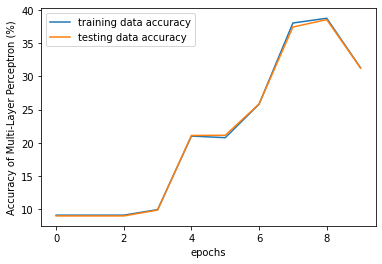

In [ ]:
from tqdm.notebook import tqdm

# INITIALISATION

alpha = 2 #Learning rate 
nh =  14 # number of hidden nodes, range is anything from 10 to 20 hidden nodes 
k0 = 10 # number of classifier outputs, i.e, number of digits
n = len(MNIST['trainX'][0][:]) # number of bits, i.e 784

W = np.random.uniform(-0.25, 0.25, size=(nh, n)).astype(np.float64) #Weighted matrix corresponding to number of hidden nodes by 784
Wh = np.random.uniform(-0.25, 0.25, size=(k0, nh)).astype(np.float64) #Weighted matrix of hidden nodes, dimensions are 10(k0) by number of hidden nodes
bj = np.random.uniform(0, 2, size = nh).astype(np.float64) #bias vector with dimension corresponding to number of hidden nodes
bk = np.random.uniform(0, 2, size = k0).astype(np.float64) #bias vector corresponding to number of output nodes

Images = MNIST['trainX'][:][:] #training images
Labels = MNIST['trainY'][0][:] #training labels 
l = n

x_axis = [] #x axis vector for plotting independent variable, either learning rate or epoch size
y_axis = [] #y axis vector for plotting dependent variable, accuracy for training data
ytest = [] # y axis vector for plotting testing data accuracy

for e in tqdm(range(10)): #plotting epochs from 1 to 20, will be different for learning rate

    ##  PERCEPTRON CLASS INSTANCES  
    mlp = MLP(alpha, Labels) #multilayer perceptron class instance

    ## TRAINING PERCEPTRON NODES
    W, Wh, bj, bk = mlp.train(Images, W, Wh, bj, bk, e)

    ## classifying Data
    ## Extracting Test Data 
    leng1 = len(MNIST['testX'][:][:]) #number of test images
    leng = len(MNIST['trainX'][:][:]) #number of training images
    TestLabel = MNIST['testY'][0][:] #test labels
    TestD = MNIST['trainY'][0][:] #training image labels

    results = classification(TestLabel) #classification class instance for test data
    res = classification(TestD) #classification class instance for training data

    MLPrst = np.empty(leng) #vector to hold MLP classified digit output for training data
    MLPrst2 = np.empty(leng1)  #vector to hold MLP classified digit output for testing data

    for i, train_data in enumerate(MNIST['trainX']): # same as above but for testing data
        _, predicted = mlp.fcompute(W, Wh, train_data, bj, bk)
        MLPrst[i] = res.map(predicted)

    for i, test_data in enumerate(MNIST['testX']): # same as above but for testing data
        _, predicted = mlp.fcompute(W, Wh, test_data, bj, bk)
        MLPrst2[i] = results.map(predicted)

    x_axis.append(e)
    y_axis.append(res.accuracy(MLPrst)) #clculating accuracy and adding it to list
    ytest.append(results.accuracy(MLPrst2)) #calc. accuracy and adding it to list

plt.plot(x_axis, y_axis, label = "training data accuracy")
plt.plot(x_axis, ytest, label = "testing data accuracy")
plt.xlabel('epochs')
plt.ylabel('Accuracy of Multi-Layer Perceptron (%)')
plt.legend(loc="upper left")
plt.show() #all the plot functions are used to plot multiple graphs on 1 plot 

In [ ]:
### SINGLE LAYER PERCEPTRON CLASS
class Perceptron:

    #Constructror.
    def __init__(self,  weights, learning_rate, bias):
        self.weights        = weights
        self.learning_rate  = learning_rate
        self.bias           = bias
 
    #Sigmoid function.
    def sigmoid(self, v):
        return np.round(1 / (1 + np.exp(-v)), 6)
 
    #Calculate error rate for a testing set.
    def err(self, d, y):
        count = 0
        for index in range(len(y)):
            if d[index] != y[index]:
                count += 1
        return count/len(d)
 
    #Normalize the image before processing it.
    def normalize_image(self, img):
        temp = np.linalg.norm(img)
        if temp == 0:
            return img
        return img / temp
 
    #Training the perceptron.
    def train(self, training_data, labels, training_class, no_of_desired_epochs, error_stop_value):
        error   = 1                 #starting with an error of 100%
        errors   = []                 #starting with an error of 100%
        epoch   = 0                 #count how many epochs passed so far
        k       = 0                 #index of element in the training data
        W_temp  = self.weights
        b_temp  = self.bias
        length  = len(training_data[:,:])    #number of training data
 
        while epoch <= no_of_desired_epochs and error > error_stop_value:
            #Create the desired output array based on training class.
            d = int(labels[k] == training_class)

            #Normalise the k-index training data set.
            training_image  = self.normalize_image(training_data[k,:])
 
            #Train the model
            temp            = training_image @ W_temp + b_temp
            y               = self.sigmoid(temp)
            
            W_temp          = W_temp + (self.learning_rate * (d - y) * y * (1 - y) * training_image)
            #W_temp          = W_temp + (self.learning_rate *(d - y) * training_image)
            b_temp          = b_temp + self.learning_rate * (d - y)
 
            k       +=  1
            errors.append(abs(d-y))

            # An epoch has finished (i.e. the whole training dataset was used for trainning)
            if k == length:
                k = 0
                epoch += 1
                error = np.mean(errors)
                errors = []
         
        #Return the updated weights and bias after training is complete.
        return W_temp, b_temp
 
 
    def predict(self, x, weights, bias):
        temp =  self.normalize_image(x) @ weights + bias
        return self.sigmoid(temp)
 
 
## Class for Single Layer Perceptron via ten layer perceptron
 
class PerceptronLayer():
 
    def __init__(self, labels):
        self.labels = labels

    def accuracy_rate(self, output):
        dif     = output - self.labels       #Compare the output with the desired labels
        #Count number of 0s in dif. 0 means the image was classified properly
        return np.sum(dif==0) / len(output) * 100

    def validate(self, p):
        return np.argmax(p)

        
########################################## MAIN ###########################################

# Comment line below and use commented for-loop if not working locally
from tqdm.notebook import tqdm

#initialisation of loop calcualting accuracy against learning rate alpha
x_axis = []     #list for plotting the learning rate.
y_axis = []     #list for plotting the error rate.
 
#for learning_rate in np.linspace(0.5, 1.2, 10):
for learning_rate in tqdm(np.linspace(0.5, 1.2, 10)):
    x_axis.append(learning_rate)
    length = len(MNIST['trainX'][0])

    # Initial values should be small, using high values will make the sigmoid return 1 every time
    weights = np.random.uniform(-0.05, 0.05, size=length).astype(np.float64)
    bias = np.random.uniform(-0.05, 0.05)

    
    #Only train on 10% of the training data.
    training_data = MNIST['trainX'][:6000]
    labels = MNIST['trainY'][0][:6000] 
    

    #Create each layer in the perceptron.
    y = [Perceptron(weights, learning_rate, bias) for i in range(10)]
    t = [None] * 10
 
    #Train the perceptrones.
    for index in range(10):
        t[index] = y[index].train(training_data, labels, index, 20, 0.05)

    
    #Start testing.
    testing_data = MNIST['testX']
    test_labels = MNIST['testY'][0]
    length_test = len(MNIST['testX'])
    
    results = PerceptronLayer(test_labels) #declare the 10 layer perceptron
    probabilities = np.empty(length_test) #store resulted probabilities 
    temporary = np.empty(10)

    for index in range(length_test):
        testing_sample = MNIST['testX'][index]

        for index2 in range(10):
            temporary[index2] = y[index2].predict(testing_sample, t[index2][0], t[index2][1])

        probabilities[index] = results.validate(temporary)

    y_axis.append(results.accuracy_rate(probabilities)) 

#Plot the results
plt.plot(x_axis, y_axis) 
plt.xlabel('alpha (learning rate)')
plt.ylabel('Accuracy rate of Single Layer Perceptron (%)')
plt.show()